In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Dataset is loaded
df = pd.read_csv("/content/Bead_prediction_data _7.csv")


#Target feature range is dropped
df = df.drop("Range (nm)", axis =1)


#Duplicate rows are dropped
df = df.drop_duplicates()

#NA values are dropped
df = df.dropna()

#Dataframe is randomly shuffled
df = df.sample(frac=1, random_state= 25)
df = df.reset_index(drop=True)


combining_Yes_YES = {"YES" : "Yes", "NO" : "No"}
df["Beads"] = df["Beads"].replace(combining_Yes_YES)
encoding_Yes_No = {"Yes" : 1, "No" : 0}
df["Beads"] = df["Beads"].replace(encoding_Yes_No)


#Features values are mapped between 0 and 1
scaler = MinMaxScaler()
column_names = ['Flory-Huggins χ parameter = (Mvol*Ra^2)/4RT',
       'Polymer Concentration (wt%)',
       'δ* =Sum of Products of Volume Fraction and δ of Individual Solvents',
       'RED', 'Feed (mL/h)', 'Voltage (kV)', 'Distance (cm)', 'Beads']
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns = column_names)


feature_rename_dictionary = { 'Flory-Huggins χ parameter = (Mvol*Ra^2)/4RT':'Chi', 'Polymer Concentration (wt%)':"Conc.",
              'δ* =Sum of Products of Volume Fraction and δ of Individual Solvents':'delta',
              "Voltage (kV)":"Voltage", "Distance (cm)":"Distance", "Feed (mL/h)" : "Feed"}

df_scaled = df_scaled.rename(columns =feature_rename_dictionary )
df_scaled["Beads"] = df_scaled["Beads"].astype(int)


#Target feature and input feature space are defined
y = df_scaled["Beads"]
X = df_scaled.drop("Beads", axis =1)

#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)





In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#function for grid search of best parameters of models
def grid_search(params, model):
  grid_cla = GridSearchCV(model, params, cv=5, n_jobs=-1)
  grid_cla.fit(X_train,y_train)
  best_params = grid_cla.best_params_
  print("Best parameters are:", best_params)
  print("Training score of best model : %.3f"%grid_cla.best_score_)
  y_pred = grid_cla.predict(X_test)
  accuracy = accuracy_score(y_pred,y_test)
  print('Testing score of best model:', accuracy)



In [9]:
# grid search for SVM model
from sklearn.svm import SVC
sv_param = {
    'C': [0.01,0.1, 1.0, 10.0, 100],
    'degree': [2,3,4,5,6],
    'coef0': [1,10,25, 50, 100, 1000]
}

grid_search( params = sv_param, model = SVC( ))

Best parameters are: {'C': 100, 'coef0': 1, 'degree': 2}
Training score of best model : 0.822
Testing score of best model: 0.8064516129032258


In [10]:
# grid search for logistic regression model
from sklearn.linear_model import LogisticRegression

log_param = {
    # 'penalty': ['l1', 'l2'],
    'C': [0.01,0.1, 1.0, 10.0,100,500,1000],
    'penalty': ["l1", "l2"],
     'class_weight' : [ {0:1,1:1}, {0:2,1:1}, {0:4,1:1}, {0:10,1:1}, {0:1, 1:2}, {0:1, 1:8} ]
    # 'max_iter': [100, 200, 300]
}

grid_search( params = log_param, model = LogisticRegression())

Best parameters are: {'C': 10.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}
Training score of best model : 0.789
Testing score of best model: 0.8064516129032258


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [11]:
# grid search for MLP model
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

mlp_param = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}


mlp = MLPClassifier()
grid_search( params = mlp_param, model = mlp)



Best parameters are: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Training score of best model : 0.811
Testing score of best model: 0.8064516129032258


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# grid search for XGBoost model
from xgboost import XGBClassifier

xg_param = {
    'n_estimators': [5] ,

    'max_depth': [4]      ,
    'min_child_weight' : [2],

    'reg_alpha': [0.0,  0.5,0.7,1.0],
    'reg_lambda': [0.0,  0.5,0.7,1.0]
}

grid_search( params = xg_param, model = XGBClassifier())



Best parameters are: {'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 5, 'reg_alpha': 0.5, 'reg_lambda': 1.0}
Training score of best model : 0.844
Testing score of best model: 0.8387096774193549


In [14]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#function to show training and testing cross validation results
def cross_validation(model):
  kf = KFold(n_splits=7, shuffle=True, random_state=42)
  val_scores = []
  val_tr_scores = []


  for train_index, val_index in kf.split(X):
      X_tr, X_val = X.loc[train_index], X.loc[val_index]
      y_tr, y_val = y.loc[train_index], y.loc[val_index]

      model.fit(X_tr, y_tr)
      y_pred = model.predict(X_val)
      y_tr_pred = model.predict(X_train)
      accuracy = accuracy_score(y_val, y_pred)
      accuracy_train = accuracy_score(y_tr_pred, y_train)
      val_scores.append(accuracy)
      val_tr_scores.append(accuracy_train)




  avg_val_score = np.mean(val_scores)
  avg_val_tr_score = np.mean(val_tr_scores)
  print("#################################################")
  print("\n")
  print("Model used is", model)
  print("\n  ")
  print("Training validation score :", avg_val_tr_score)
  print("Testing validation score :", avg_val_score)
  print("\n")
  print("#################################################")
  print("\n \n \n \n \n \n")




In [15]:
#7-fold cross validation of all five models
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

cross_validation( model = XGBClassifier(max_depth = 4, min_child_weight = 2,
                  n_estimators = 5, reg_alpha = 0.5, reg_lambda = 1.0))

cross_validation(model = SVC( C=10.0, kernel='poly', degree = 3, coef0 = 10))

cross_validation(model = LogisticRegression( C= 10.0, class_weight = {0: 1, 1: 1}, penalty = 'l2', max_iter = 1000))

cross_validation(model = GaussianNB())

cross_validation(model = MLPClassifier(activation = 'relu', alpha = 0.001,
                                       hidden_layer_sizes = (100, 50), learning_rate = 'adaptive',
                                       solver = 'adam', max_iter = 5000))



#################################################


Model used is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

  
Training validation score : 0.8746031746031744
Testing validation score : 0.7497665732959852


#################################################

 
 
 
 
 

#############################

In [16]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



#function to plot decision boundary for a model trained on 2 feature data subset
def decision_boundary(X_m, model):
  X_t, X_te, y_t, y_te = train_test_split(X_m, y, test_size=0.2, random_state = 22)


  model.fit(X_t, y_t)
  y_pred = model.predict(X_te)
  y_pred_tr = model.predict(X_t)

  accuracy = accuracy_score(y_te, y_pred)
  accuracy_tr = accuracy_score(y_t, y_pred_tr)


  print("\n \n \n \n \n")
  print("Training accuracy of this classifier is:", accuracy_tr)
  print("Testing accuracy of this classifier is:", accuracy)

  x_min, x_max = X_t.iloc[:, 0].min() - 0.05, X_t.iloc[:, 0].max() + 0.05
  y_min, y_max = X_t.iloc[:, 1].min() - 0.05, X_t.iloc[:, 1].max() + 0.05

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                      np.arange(y_min, y_max, 0.005))

  predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = predictions
  Z = Z.reshape(xx.shape)


  # Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.8)

  # Plot the training data points
  plt.scatter(X_t.iloc[:, 0], X_t.iloc[:, 1], c=y_t)

  Feature1 = X_t.columns.tolist()[0]
  Feature2 = X_t.columns.tolist()[1]
  plt.xlabel(Feature1)
  plt.ylabel(Feature2)
  plt.title('Decision Boundary')


  plt.show()








 
 
 
 

Training accuracy of this classifier is: 0.8958333333333334
Testing accuracy of this classifier is: 0.68


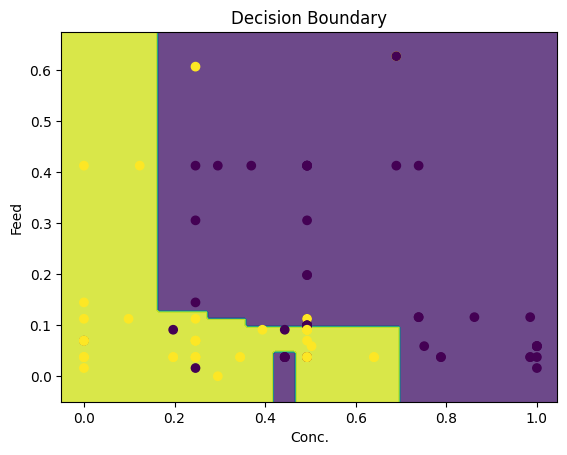


 
 
 
 

Training accuracy of this classifier is: 0.8333333333333334
Testing accuracy of this classifier is: 0.76


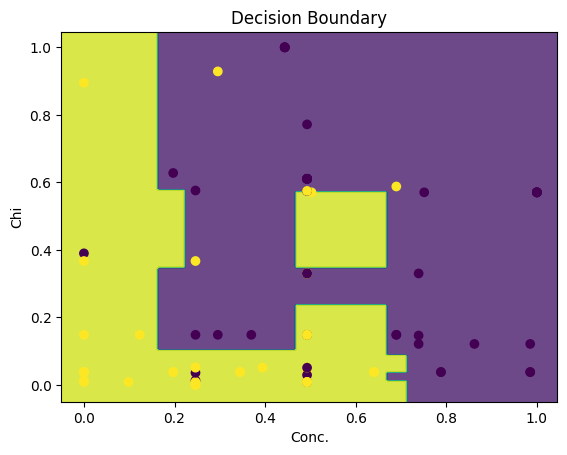


 
 
 
 

Training accuracy of this classifier is: 0.8125
Testing accuracy of this classifier is: 0.68


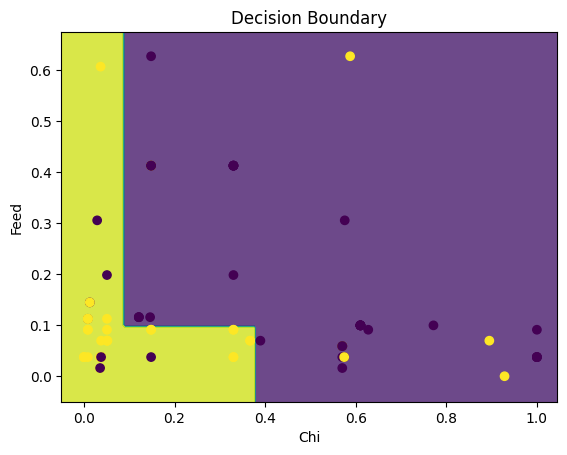

In [17]:
#Decision boundaries plotted for dataset of combination of features - Conc., Feed and Chi
#for XGBoost model

df1 = df_scaled[["Conc.", "Feed"]]
df2 = df_scaled[["Conc.", "Chi"]]
df3 = df_scaled[["Chi", "Feed"]]


decision_boundary(X_m = df1, model = XGBClassifier(n_estimators =8, objective='binary:logistic',  min_child_weight = 2,
                        max_depth = 8,   reg_alpha = 0.0, reg_lambda = 0.5))

decision_boundary(X_m = df2, model = XGBClassifier(n_estimators =8, objective='binary:logistic',  min_child_weight = 2,
                        max_depth = 8,   reg_alpha = 0.0, reg_lambda = 0.5))
decision_boundary(X_m = df3, model = XGBClassifier(n_estimators =8, objective='binary:logistic',  min_child_weight = 2,
                        max_depth = 8,   reg_alpha = 0.0, reg_lambda = 0.5))









 
 
 
 

Training accuracy of this classifier is: 0.7291666666666666
Testing accuracy of this classifier is: 0.56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


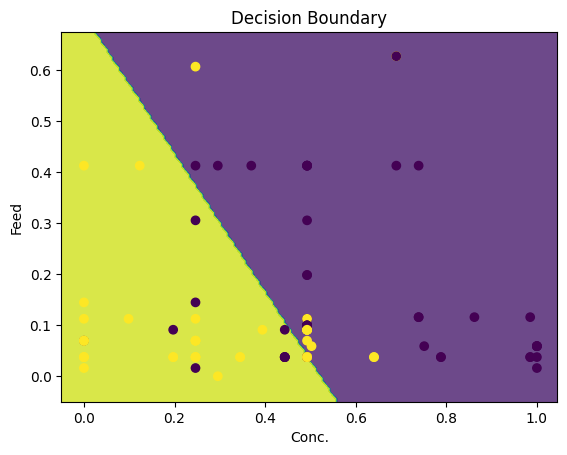


 
 
 
 

Training accuracy of this classifier is: 0.7604166666666666
Testing accuracy of this classifier is: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


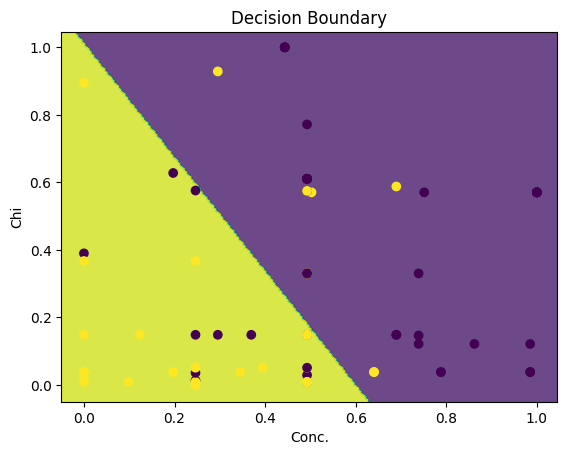


 
 
 
 

Training accuracy of this classifier is: 0.71875
Testing accuracy of this classifier is: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


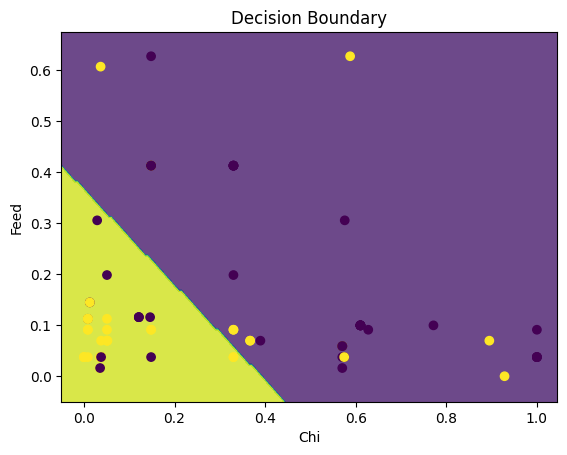

In [18]:
#Decision boundaries plotted for dataset of combination of features - Conc., Feed and Chi
#for Logistic regression
decision_boundary(X_m = df1, model = LogisticRegression( C =100, penalty = 'l1', solver= 'liblinear', max_iter = 1000))

decision_boundary(X_m = df2, model = LogisticRegression( C =100, penalty = 'l1', solver= 'liblinear', max_iter = 1000))

decision_boundary(X_m = df3, model = LogisticRegression( C =100, penalty = 'l1', solver= 'liblinear', max_iter = 1000))


 
 
 
 

Training accuracy of this classifier is: 0.8125
Testing accuracy of this classifier is: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


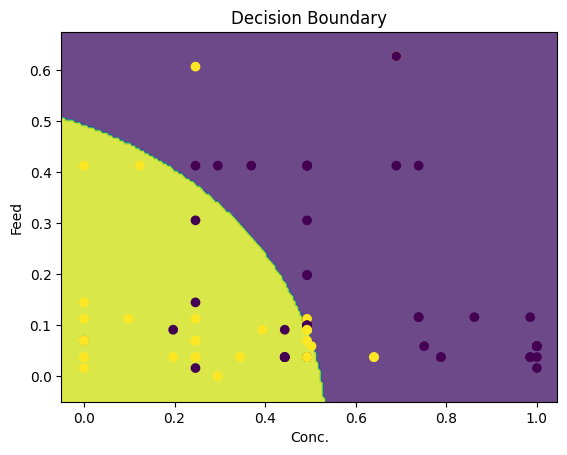


 
 
 
 

Training accuracy of this classifier is: 0.7708333333333334
Testing accuracy of this classifier is: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


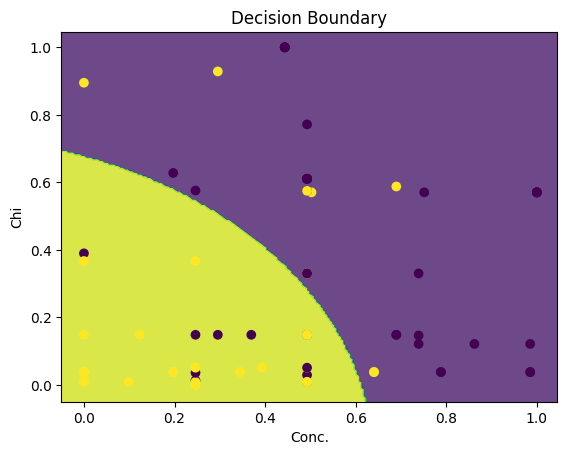


 
 
 
 

Training accuracy of this classifier is: 0.7604166666666666
Testing accuracy of this classifier is: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


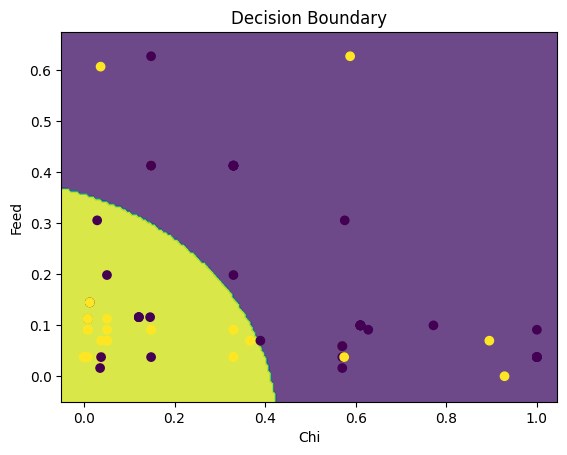

In [19]:
#Decision boundaries plotted for dataset of combination of features - Conc., Feed and Chi
#for Gaussian Naive Bayes model
decision_boundary(X_m = df1, model = GaussianNB())

decision_boundary(X_m = df2, model = GaussianNB())
decision_boundary(X_m = df3, model = GaussianNB())


 
 
 
 

Training accuracy of this classifier is: 0.7291666666666666
Testing accuracy of this classifier is: 0.56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


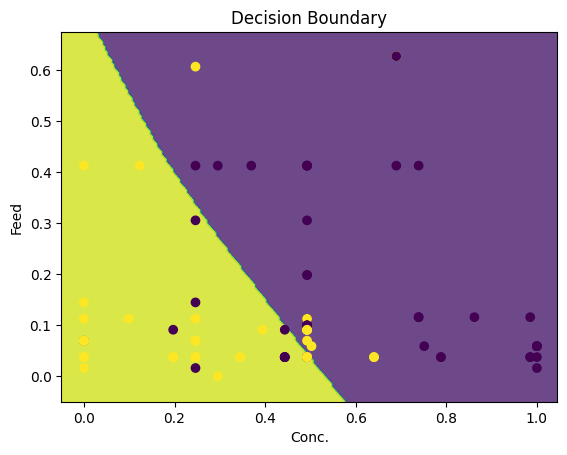


 
 
 
 

Training accuracy of this classifier is: 0.78125
Testing accuracy of this classifier is: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


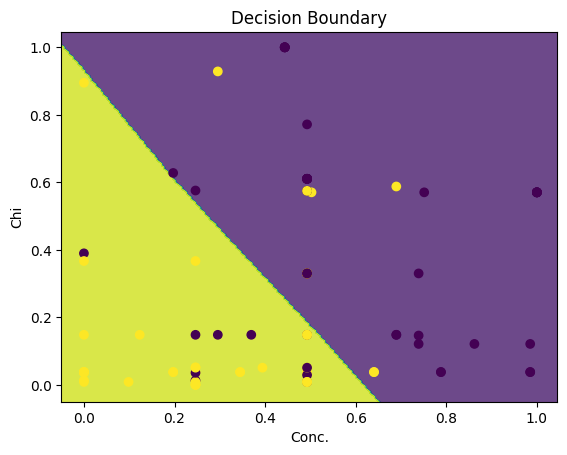


 
 
 
 

Training accuracy of this classifier is: 0.6979166666666666
Testing accuracy of this classifier is: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


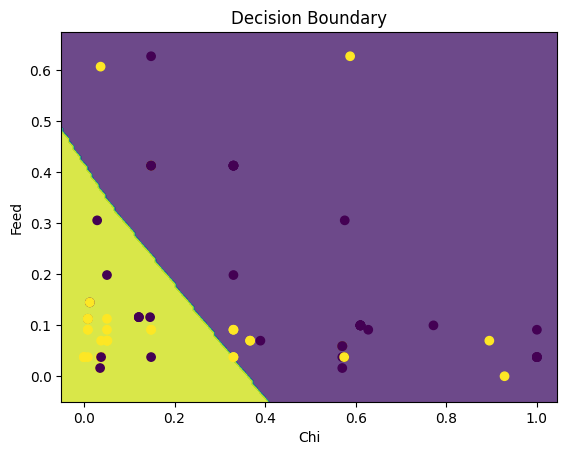

In [20]:
#Decision boundaries plotted for dataset of combination of features - Conc., Feed and Chi
#for MLP Classifier

ml = MLPClassifier(activation = 'relu', alpha  =0.0001,
                     hidden_layer_sizes = (100,), learning_rate = 'adaptive',
                    solver = 'adam', max_iter = 5000)


decision_boundary(X_m = df1, model = ml)

decision_boundary(X_m = df2, model = ml)
decision_boundary(X_m = df3, model = ml)


In [21]:
import pandas as pd
import plotly.graph_objects as go


#function to plot 3D graph of three features at a time

def plot_3d(columns_3):
  col = y
  fig = go.Figure(data=[go.Scatter3d(
    x = X[ columns_3[0]],
    y = X[columns_3[1]],
    z = X[ columns_3[2]],

      mode='markers',
      marker=dict(
          size=5,
          color=col,
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig.update_layout(scene=dict(
      xaxis_title='Conc.',
      yaxis_title='Feed',
      zaxis_title='Chi'
  ))

  fig.show()





In [22]:
col1 = ["Conc.", 'Feed','Chi']
col2 = ["RED", 'Feed','Chi']
col3 = ["Conc.", 'RED','Chi']
col4 = ["Conc.", 'Feed','RED']
col5 = ['Voltage', 'delta', "Distance"]

plot_3d(col1)
plot_3d(col2)
plot_3d(col3)
plot_3d(col4)
plot_3d(col5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 22.0 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/121 [00:00<?, ?it/s]

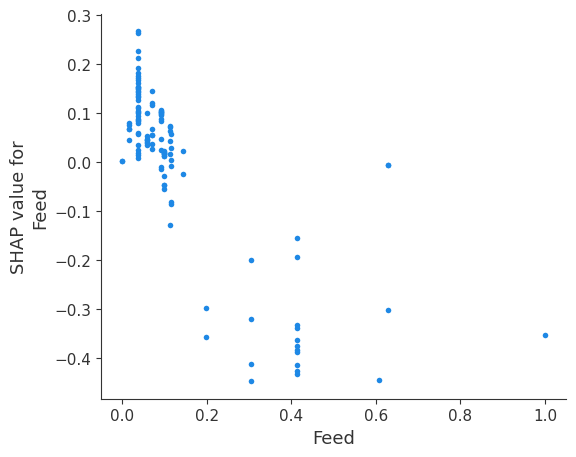

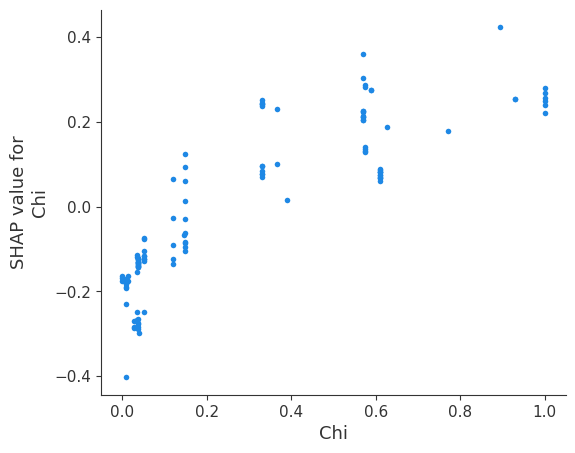

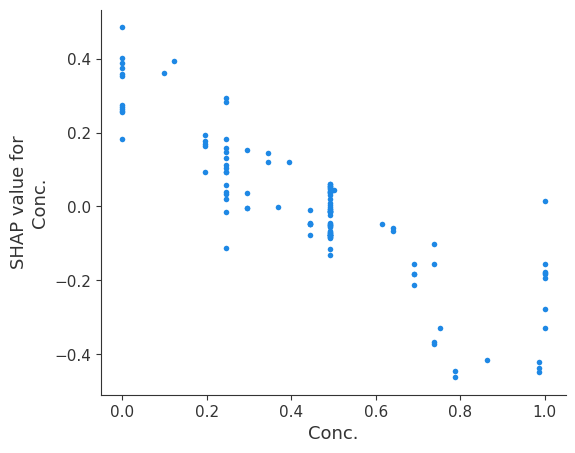

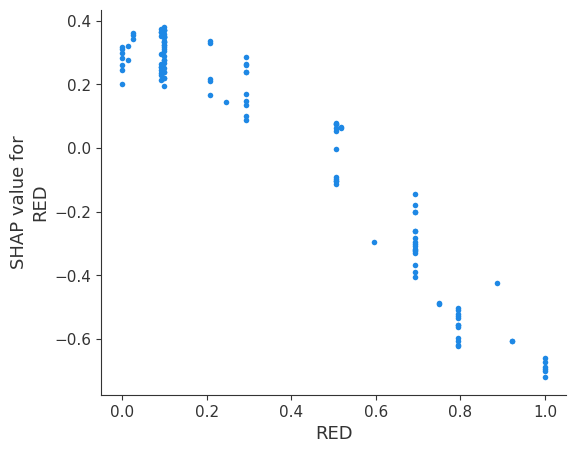

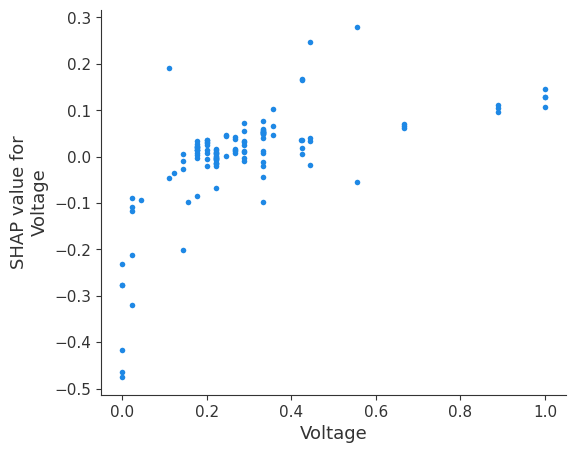

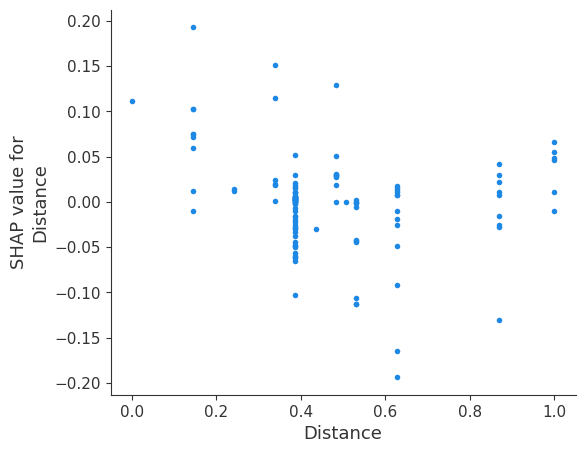

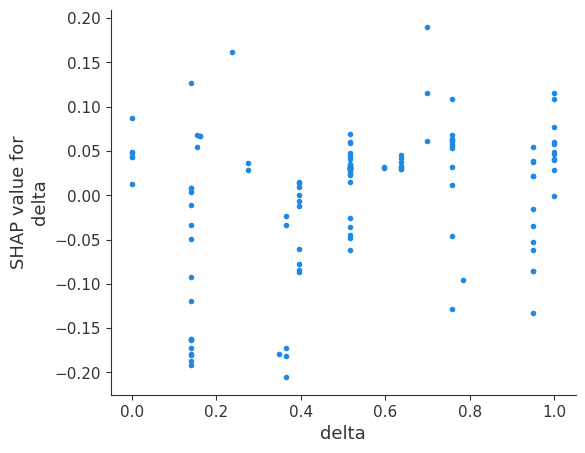

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


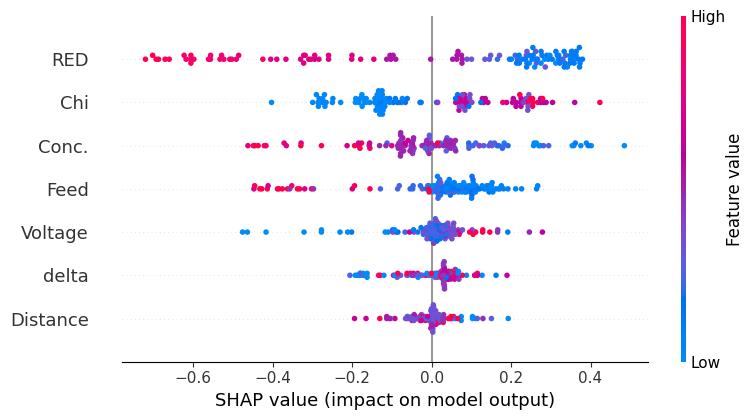

In [23]:
!pip install shap

#Shap dependance plots and shap summary plots of SVM model

import shap
from sklearn import svm
svm = svm.SVC(C=10.0, kernel='poly', degree = 3, coef0 = 10)
svm.fit(X,y)

svm_explainer = shap.KernelExplainer(svm.predict,X)
svm_shap_values = svm_explainer.shap_values(X)
shap.dependence_plot('Feed', svm_shap_values, X, interaction_index=None)

shap.dependence_plot('Chi', svm_shap_values, X, interaction_index=None)
shap.dependence_plot('Conc.', svm_shap_values, X, interaction_index=None)
shap.dependence_plot('RED', svm_shap_values, X, interaction_index=None)
shap.dependence_plot('Voltage', svm_shap_values, X, interaction_index=None)
shap.dependence_plot('Distance', svm_shap_values, X, interaction_index=None)
shap.dependence_plot('delta', svm_shap_values, X, interaction_index=None)
shap.summary_plot(svm_shap_values, X)

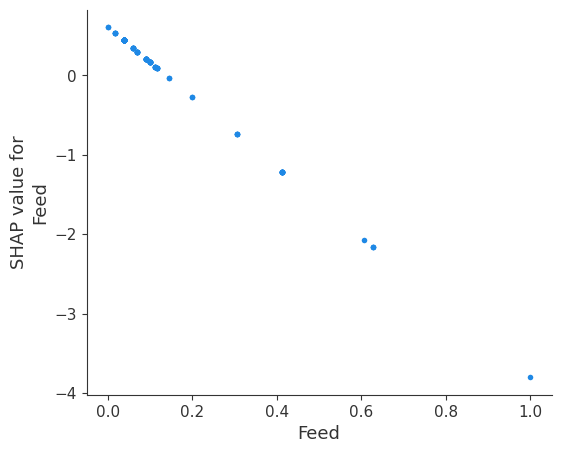

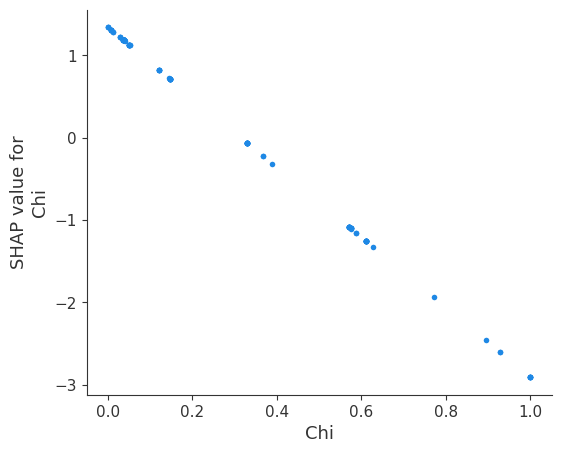

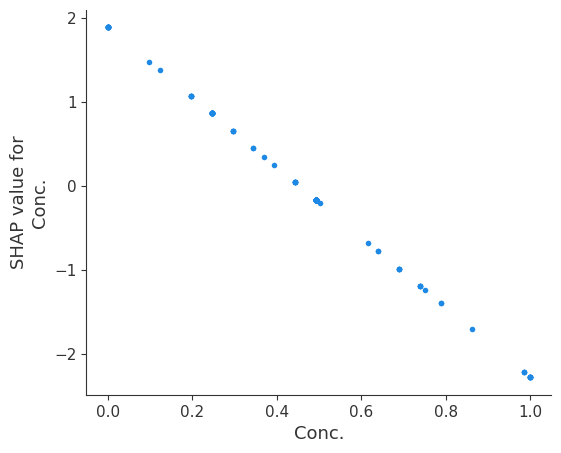

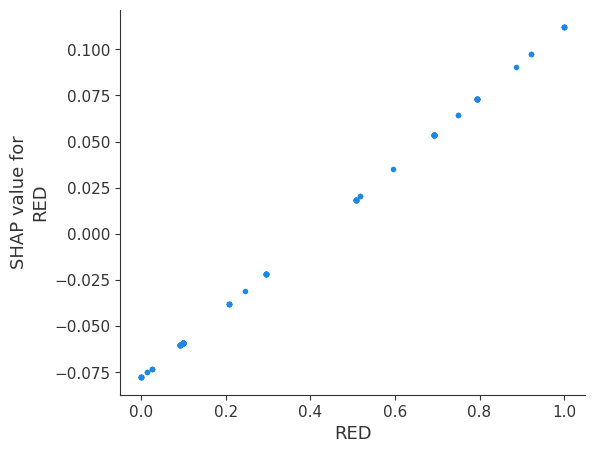

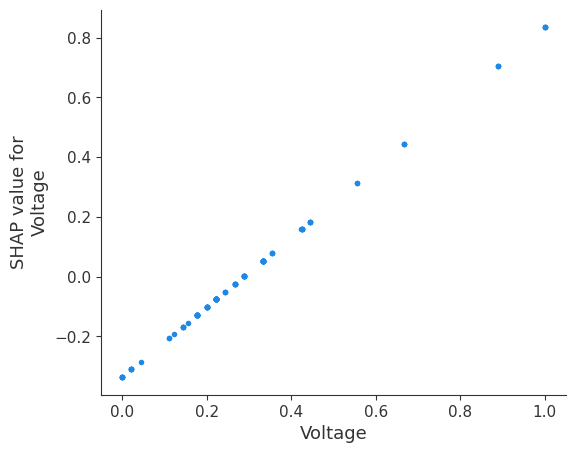

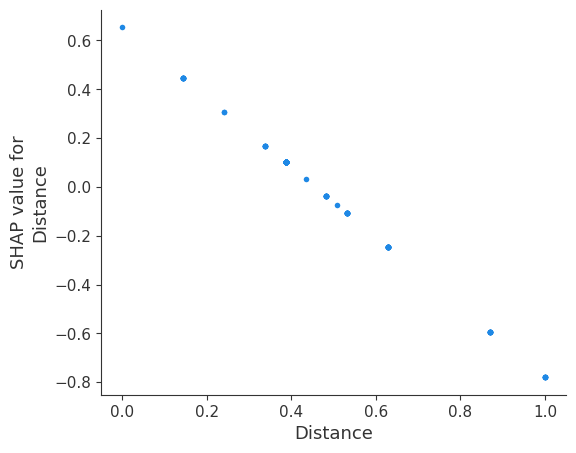

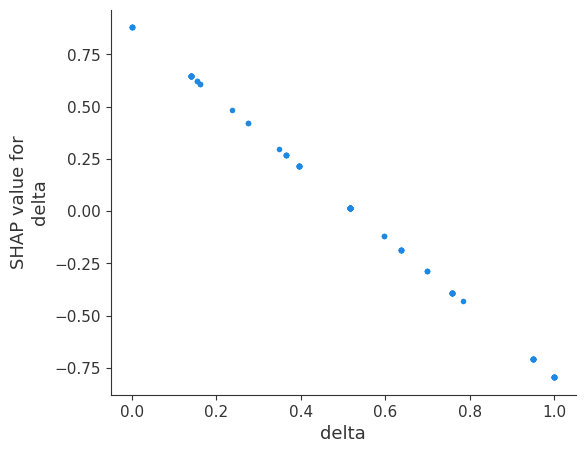

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


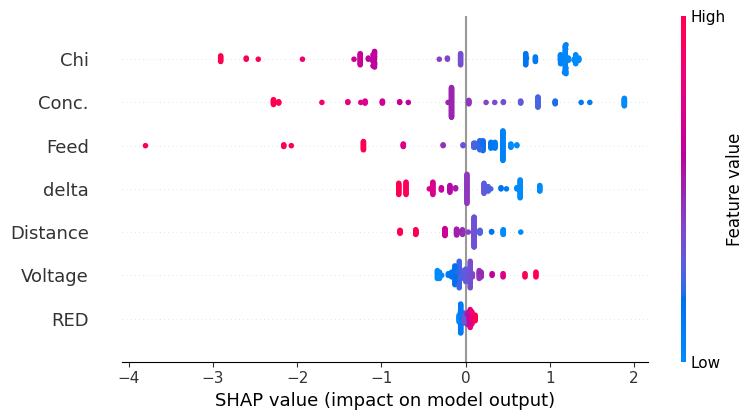

In [24]:

#Shap dependance plots and shap summary plots of logistic regression model

log = LogisticRegression( C =100, penalty = 'l2', solver= 'liblinear')
log.fit(X,y)

explainer = shap.LinearExplainer(log, X)
log_shap_values = explainer.shap_values(X)
shap.dependence_plot('Feed', log_shap_values, X, interaction_index=None)

shap.dependence_plot('Chi', log_shap_values, X, interaction_index=None)
shap.dependence_plot('Conc.', log_shap_values, X, interaction_index=None)
shap.dependence_plot('RED', log_shap_values, X, interaction_index=None)
shap.dependence_plot('Voltage', log_shap_values, X, interaction_index=None)
shap.dependence_plot('Distance', log_shap_values, X, interaction_index=None)
shap.dependence_plot('delta', log_shap_values, X, interaction_index=None)
shap.summary_plot(log_shap_values, X)


  0%|          | 0/121 [00:00<?, ?it/s]

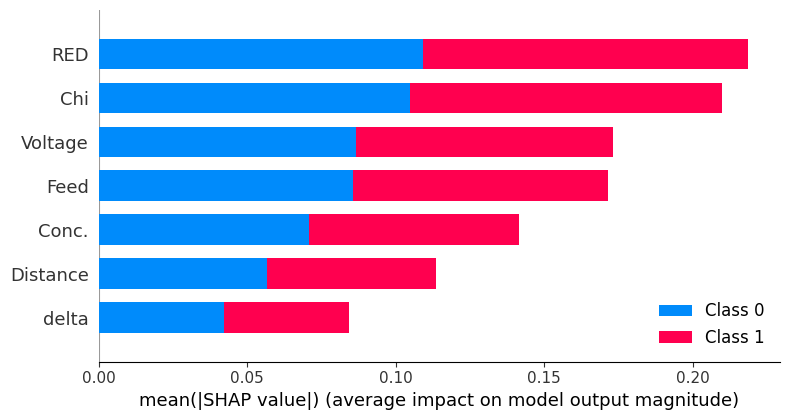

In [25]:
import shap
from sklearn.naive_bayes import GaussianNB

#Shap dependance plots and shap summary plots of Gaussian Naive Bayes model

gnb = GaussianNB()
gnb.fit(X, y)
# Assuming you have a trained Gaussian Naive Bayes model called 'gnb' and your input data is 'X'
explainer = shap.KernelExplainer(gnb.predict_proba, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)


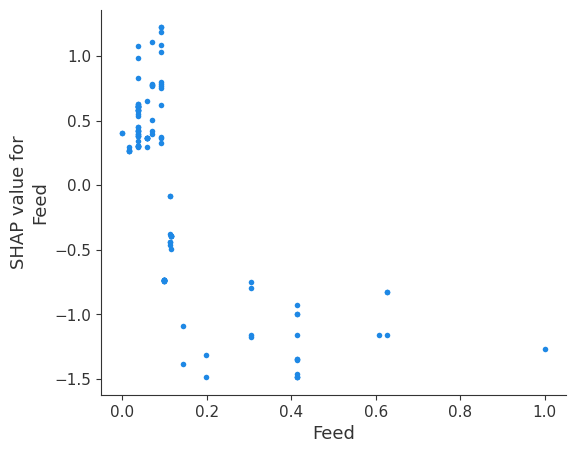

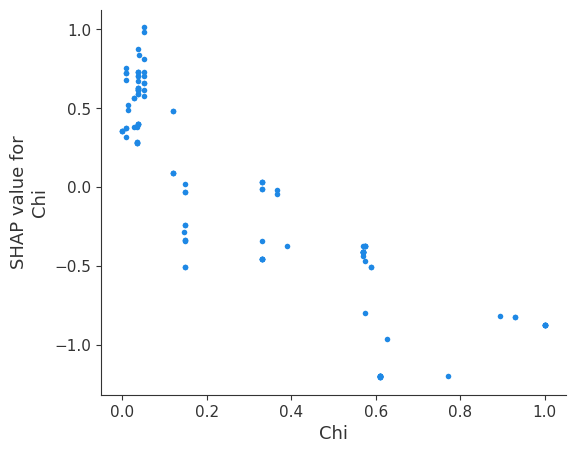

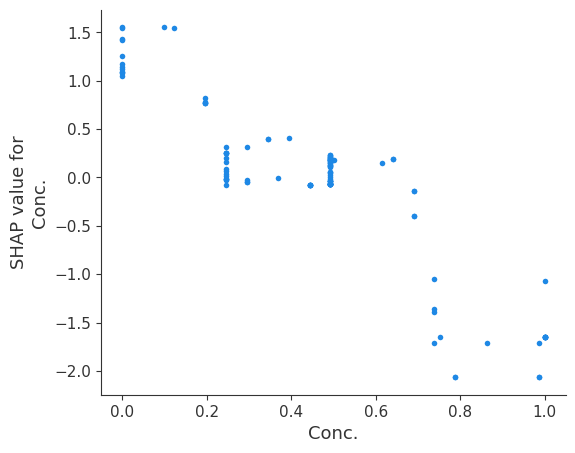

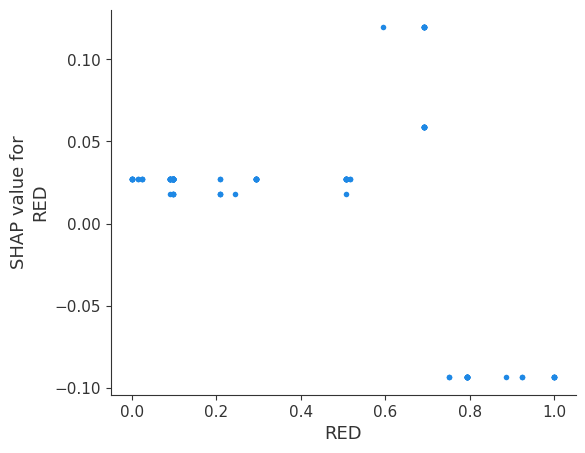

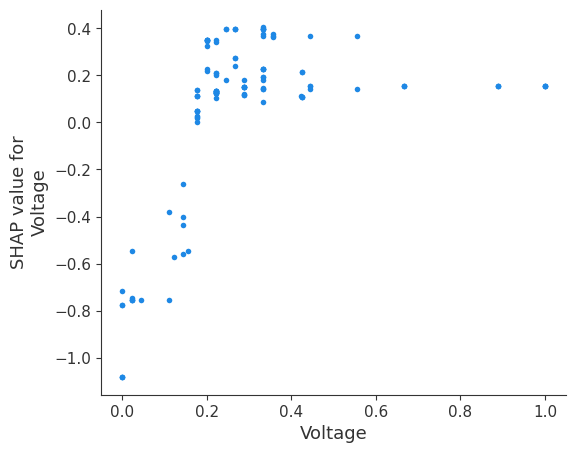

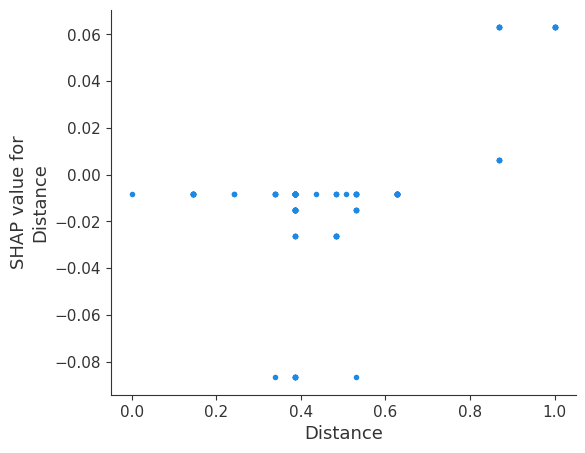

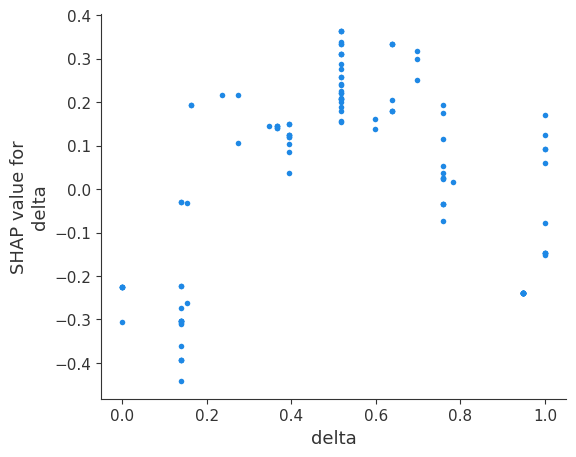

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


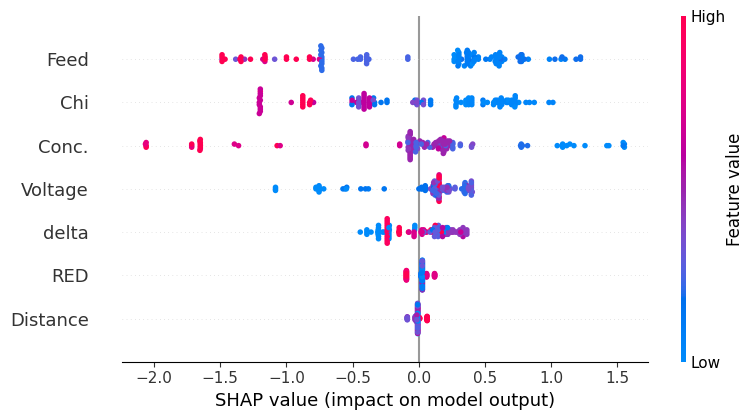

In [26]:
import shap
import xgboost as xgb


#Shap dependance plots and shap summary plots of XGB model

xgb_model = xgb.XGBClassifier(n_estimators =8, objective='binary:logistic', max_depth = 5, min_child_weight = 2)
xgb_model.fit(X, y)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

shap.dependence_plot('Feed', shap_values, X, interaction_index=None)
shap.dependence_plot('Chi', shap_values, X, interaction_index=None)
shap.dependence_plot('Conc.', shap_values, X, interaction_index=None)
shap.dependence_plot('RED', shap_values, X, interaction_index=None)
shap.dependence_plot('Voltage', shap_values, X, interaction_index=None)
shap.dependence_plot('Distance', shap_values, X, interaction_index=None)
shap.dependence_plot('delta', shap_values, X, interaction_index=None)
shap.summary_plot(shap_values, X)





  0%|          | 0/121 [00:00<?, ?it/s]

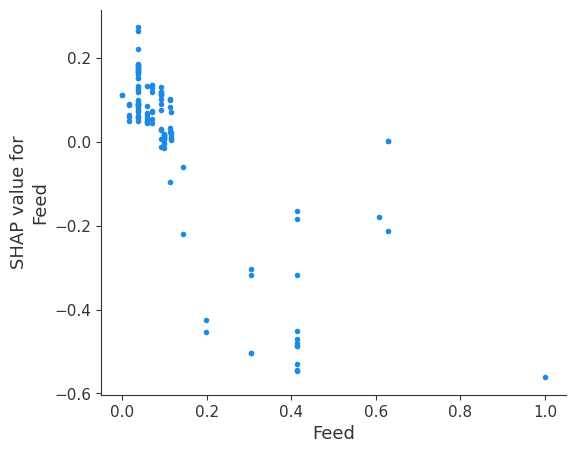

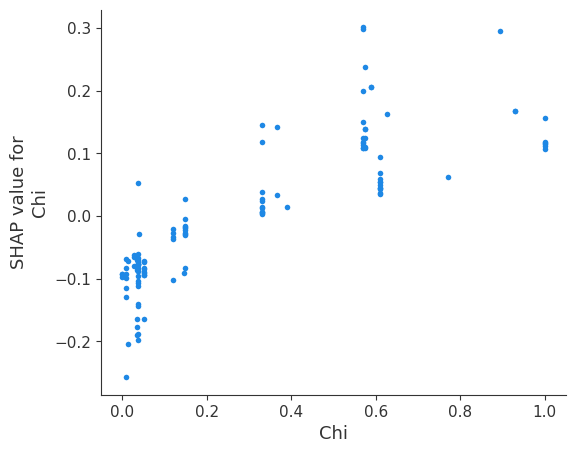

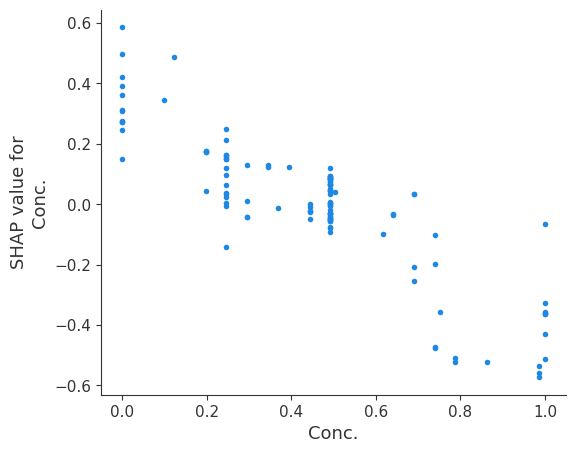

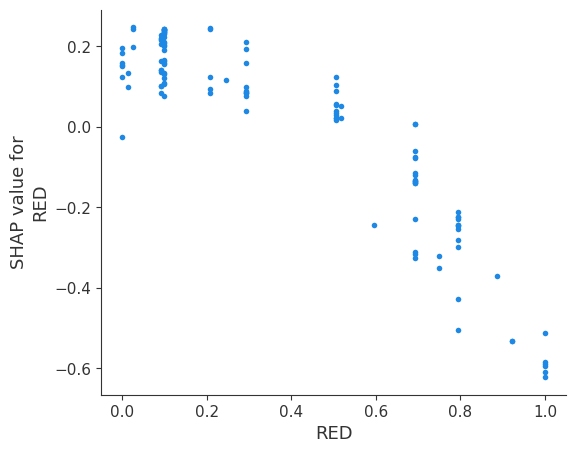

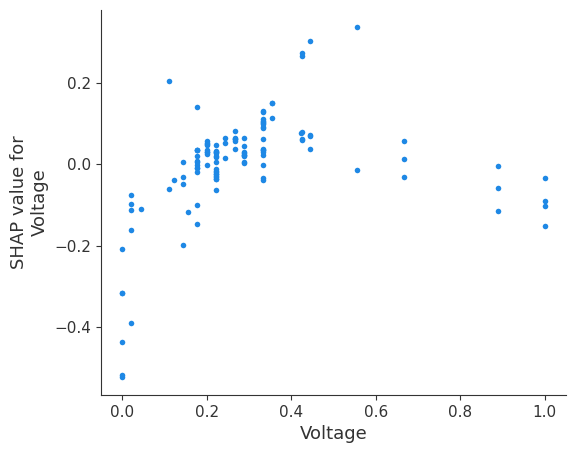

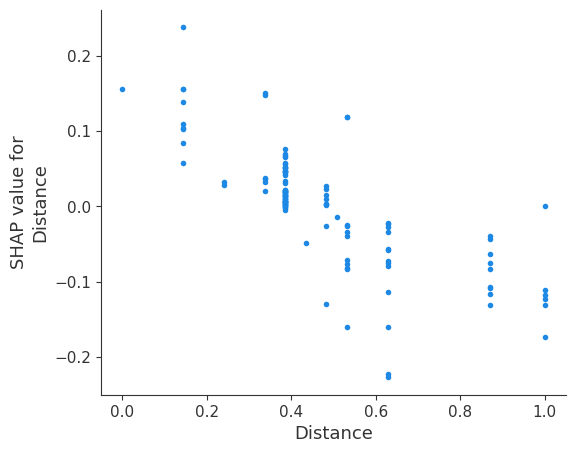

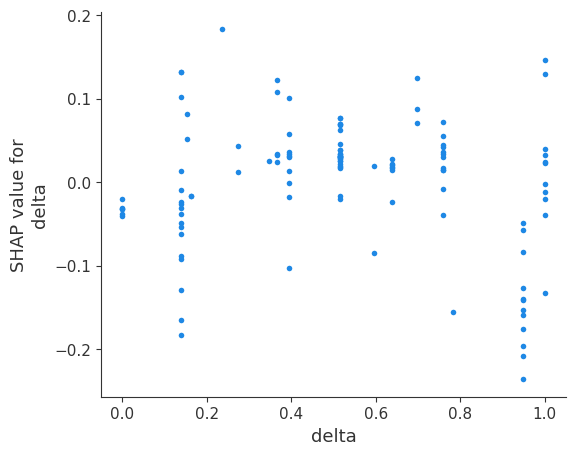

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


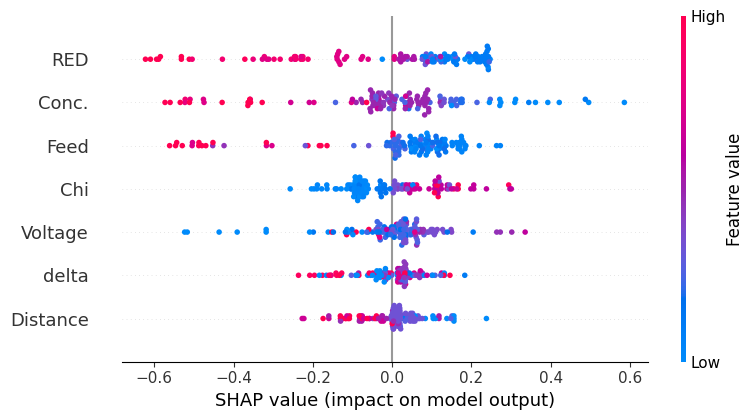

In [28]:
import shap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


#Shap dependance plots and shap summary plots of MLP model

model = MLPClassifier(activation = 'relu', alpha = 0.001,
                                       hidden_layer_sizes = (100, 50), learning_rate = 'adaptive',
                                       solver = 'adam', max_iter = 5000)


model.fit(X,y)
explainer = shap.KernelExplainer(model.predict,X)
shap_values = explainer.shap_values(X)
shap.dependence_plot('Feed', shap_values, X, interaction_index=None)
shap.dependence_plot('Chi', shap_values, X, interaction_index=None)
shap.dependence_plot('Conc.', shap_values, X, interaction_index=None)
shap.dependence_plot('RED', shap_values, X, interaction_index=None)
shap.dependence_plot('Voltage', shap_values, X, interaction_index=None)
shap.dependence_plot('Distance', shap_values, X, interaction_index=None)
shap.dependence_plot('delta', shap_values, X, interaction_index=None)
shap.summary_plot(shap_values,X)